In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras.layers as layers
import numpy as np

In [5]:
path_data = 'data/'

In [6]:
#LOAD DATASET

In [7]:
img = tf.keras.preprocessing.image.load_img(
    path_data + 'data_subset/data_subset/a01-000u-s00-00.png')
img_np = np.expand_dims(np.array(img), axis=0)

<class 'numpy.ndarray'>
(1, 89, 1661, 3)


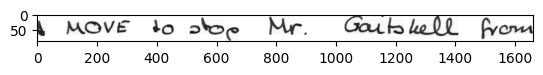

In [8]:
plt.imshow(img_np[0])
print(type(img_np))
print(img_np.shape)

In [9]:
def get_encoder():
    input = layers.Input(shape=(89, 1661, 3,))

    x = layers.Conv2D(8, 3, padding='same', activation='tanh')(input)

    x = layers.Conv2D(16, (2, 4), padding='same', activation='tanh')(x)
    delt = layers.Conv2D(16, 3, padding='same', activation='sigmoid')(x)
    x = x * delt

    x = layers.Conv2D(32, 3, padding='same', activation='tanh')(x)
    delt = layers.Conv2D(32, 3, padding='same', activation='sigmoid')(x)
    x = x * delt

    x = layers.Conv2D(64, (2, 4), padding='same', activation='tanh')(x)
    delt = layers.Conv2D(64, 3, padding='same', activation='sigmoid')(x)
    x = x * delt

    x = layers.Conv2D(128, 3, padding='same', activation='tanh')(input)
    return tf.keras.Model(inputs=input, outputs=x)

In [18]:
def max_pooling(input):
    res = layers.MaxPool2D(pool_size=(89, 1), padding='valid')(input)
    res = tf.squeeze(res, axis = 1)
    return res

In [19]:
encoder = get_encoder()

In [20]:
encoded = encoder(img_np)
print(encoded.shape)

(1, 89, 1661, 128)


In [21]:
pooled = max_pooling(encoded)

In [22]:
print(pooled.shape)

(1, 1661, 128)


In [23]:
def decoder():
    input = nn.Input(shape=(1661, 128,))